In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# 15. Maximum Sum Circular Subarray -- Kadane's algorithm -- cope with finding  maximum sum subarray）

Given a circular array C of integers represented by A, find the maximum possible sum of a non-empty subarray of C.

Here, a circular array means the end of the array connects to the beginning of the array.  (Formally, C[i] = A[i] when 0 <= i < A.length, and C[i+A.length] = C[i] when i >= 0.)

Also, a subarray may only include each element of the fixed buffer A at most once.  (Formally, for a subarray C[i], C[i+1], ..., C[j], there does not exist i <= k1, k2 <= j with k1 % A.length = k2 % A.length.)

Example 1:  
Input: [1,-2,3,-2]  
Output: 3  
Explanation: Subarray [3] has maximum sum 3

Example 2:   
Input: [5,-3,5]  
Output: 10  
Explanation: Subarray [5,5] has maximum sum 5 + 5 = 10

Example 3:  
Input: [3,-1,2,-1]  
Output: 4  
Explanation: Subarray [2,-1,3] has maximum sum 2 + (-1) + 3 = 4  

Example 4:  
Input: [3,-2,2,-3]  
Output: 3  
Explanation: Subarray [3] and [3,-2,2] both have maximum sum 3   

Example 5:  
Input: [-2,-3,-1]  
Output: -1  
Explanation: Subarray [-1] has maximum sum -1

- Compare 2 case
    - 1.normal case，maximal subarray sum
        - a subarray
    - 2.circuit - head-to-tail
        - idea：sum of array 'minus' the smallest subarry sum
    - corner case：If the array is all negative, then the largest array sum is the maximum value of the array

In [29]:
def maxSubarraySumCircular(A) -> int:
    if all(t<0 for t in A): 
        return max(A)
    ma_, mi_=float('-inf'),float('inf')
    ma, mi = float('-inf'),float('inf')
    s = su = 0
    for i in A:
        s += i
        ma_ = max(ma_,s)
        mi_ = min(mi_,s)
        ma = max(ma,s-mi_)
        mi = min(mi,s-ma_)
        su += i
        #print("i:",i,"s:",s,"ma_:",ma_,"mi_:",mi_,"ma:",ma,"mi:",mi,"su:",su)
    return max(ma,su-mi)

In [30]:
maxSubarraySumCircular([5,-3,5])

10

# 16. Odd Even Linked List

Given a singly linked list, group all odd nodes together followed by the even nodes. Please note here we are talking about the node number and not the value in the nodes.

You should try to do it in place. The program should run in **O(1) space complexity and O(nodes) time complexity**.

Example 1:  
Input: 1->2->3->4->5->NULL   
Output: 1->3->5->2->4->NULL  

Example 2:  
Input: 2->1->3->5->6->4->7->NULL  
Output: 2->3->6->7->1->5->4->NULL  

Note:  
The relative order inside both the even and odd groups should remain as it was in the input.  
The first node is considered odd, the second node even and so on ...

**Idea**
- Construc odd + even linked lists (d1,d2). i: node number (odd + even)
- Traversal in head. put odd node in d1, put even in d2
- Notice: even.next = None, terminate the list
- At last, connect d1 and d2

In [ ]:
# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, val=0, next=None):
#         self.val = val
#         self.next = next
class Solution:
    def oddEvenList(self, head: ListNode) -> ListNode:       
        d1 = odd = ListNode(0) #initialization, d1, odd node number
        d2 = even = ListNode(0)                #d2, even node number
        i = 1
        while head: #traversal in head
            if i%2:
                odd.next = head
                odd = odd.next
            else:
                even.next = head
                even = even.next
            i += 1
            head = head.next
        even.next = None
        odd.next = d2.next
        return d1.next

# 17. Find All Anagrams in a String -- Sliding windows / Hash table

Given a string s and a non-empty string p, find all the start indices of p's anagrams in s.  
Strings consists of lowercase English letters only and the length of both strings s and p will not be larger than 20,100.  
The order of output does not matter.

Example 1:  
Input:  
s: "cbaebabacd" p: "abc"  
Output:    
[0, 6]  

Explanation:
The substring with start index = 0 is "cba", which is an anagram of "abc".
The substring with start index = 6 is "bac", which is an anagram of "abc".

Example 2:  
Input:   
s: "abab" p: "ab"   
Output:  
[0, 1, 2]  

Explanation:
The substring with start index = 0 is "ab", which is an anagram of "ab".  
The substring with start index = 1 is "ba", which is an anagram of "ab".  
The substring with start index = 2 is "ab", which is an anagram of "ab". 

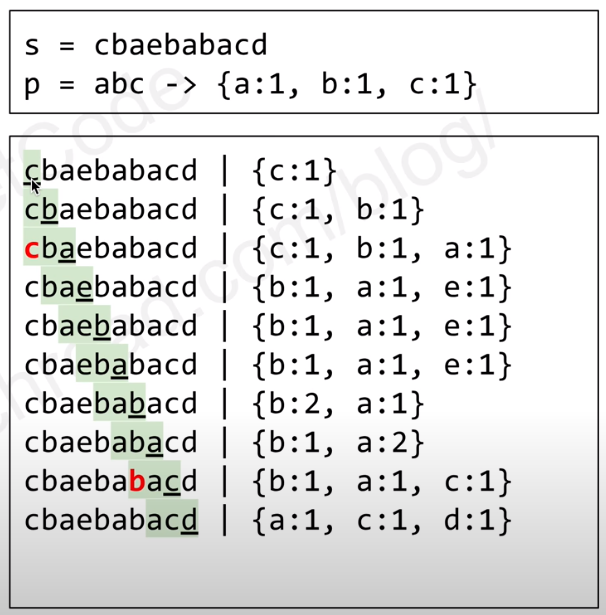

In [142]:
from IPython.display import Image
Image(filename = '.\Find All Anagrams in a String.jpg', width=200, height=300)

In [137]:
def findAnagrams(s: str, p: str):
    import collections
    ans = []
    scounter = collections.Counter()
    pcounter = collections.Counter(p)
    lens = len(s)
    lenp = len(p)
    for i in range(lens):
        scounter[s[i]] += 1
        if i >= lenp:
            scounter[s[i-lenp]] -= 1
            if scounter[s[i-lenp]] == 0:
                del scounter[s[i-lenp]]
        if scounter == pcounter:
            ans.append(i - lenp + 1)
    return ans

In [138]:
s = "cbaebabacd" 
p = "abc"
findAnagrams(s,p)

Counter({'c': 1})
Counter({'c': 1, 'b': 1})
Counter({'c': 1, 'b': 1, 'a': 1})
Counter({'c': 1, 'b': 1, 'a': 1, 'e': 1})
Counter({'b': 2, 'a': 1, 'e': 1})
Counter({'a': 2, 'b': 1, 'e': 1})
Counter({'b': 2, 'a': 1, 'e': 1})
Counter({'b': 2, 'a': 2})
Counter({'a': 2, 'b': 1, 'c': 1})
Counter({'b': 1, 'a': 1, 'c': 1, 'd': 1})


[0, 6]

In [143]:
# My Solution - time exceeded
def findAnagrams2(s: str, p: str):
    from collections import Counter
    ans = []
    pcounter = Counter(p)
    lens = len(s)
    lenp = len(p)
    for i in range(lens):
        if s[i] in p:
            if Counter(s[i:i+lenp]) == pcounter:
                ans.append(i)
    return ans

In [139]:
s2 = "abab"
p2 = "ab"
findAnagrams2(s2,p2)

[0, 1, 2]

# 18. Permutation in String

Given two strings s1 and s2, write a function to return true if s2 contains the permutation of s1. In other words, one of the first string's permutations is the substring of the second string.

Example 1:  
Input: s1 = "ab" s2 = "eidbaooo"  
Output: True  
Explanation: s2 contains one permutation of s1 ("ba").

Example 2:  
Input:s1= "ab" s2 = "eidboaoo"  
Output: False 

Note:  
The input strings only contain lower case letters.  
The length of both given strings is in range [1, 10,000].

### My Solution -- collections.Counter

In [14]:
def checkInclusion(s1: str, s2: str) -> bool:
    if not n1:
        return True
    if n1 > n2:
        return False
    
    from collections import Counter
    s1_counter = Counter(s1) 
    s1len = len(s1)
    s1set = set(s1)
    for i in range(len(s2)-s1len+1):
        if s2[i] in s1set:
            if Counter(s2[i:i+s1len]) == s1_counter:
                return True
    return False        

In [23]:
s1 = "ab" 
s2 = "eidbaooo"
print(checkInclusion(s1, s2))
s3= "ab" 
s4 = "eidboaoo"
print(checkInclusion(s3, s4))

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
False


### Solution 2 - ord() + Sliding window

In [22]:
def checkInclusion2(s1: str, s2: str) -> bool:
    n1, n2 = len(s1), len(s2)
    if not n1:
        return True
    if n1 > n2:
        return False

    offset = ord('a')
    s1_counts = [0]*26
    s2_counts = [0]*26
    for i in range(n1):
        s1_counts[ord(s1[i]) - offset] += 1
        s2_counts[ord(s2[i]) - offset] += 1

    for i in range(n2 - n1):
        if s1_counts == s2_counts:
            return True

        s2_counts[ord(s2[i + n1]) - offset] += 1
        s2_counts[ord(s2[i]) - offset] -= 1


    return s1_counts == s2_counts

# 19. Online Stock Span

Write a class StockSpanner which collects daily price quotes for some stock, and returns the span of that stock's price for the current day.  
The span of the stock's price today is defined as the maximum number of consecutive days (starting from today and going backwards) for which the price of the stock was less than or equal to today's price.  
For example, if the price of a stock over the next 7 days were [100, 80, 60, 70, 60, 75, 85], then the stock spans would be [1, 1, 1, 2, 1, 4, 6].

Example 1:

Input: ["StockSpanner","next","next","next","next","next","next","next"], [[],[100],[80],[60],[70],[60],[75],[85]]  
Output: [null,1,1,1,2,1,4,6]  
Explanation:   
First, S = StockSpanner() is initialized.  Then:  
S.next(100) is called and returns 1,   
S.next(80) is called and returns 1,  
S.next(60) is called and returns 1,  
S.next(70) is called and returns 2,  
S.next(60) is called and returns 1,  
S.next(75) is called and returns 4,  
S.next(85) is called and returns 6.  

Note that (for example) S.next(75) returned 4, because the last 4 prices  
(including today's price of 75) were less than or equal to today's price.

Note:  
Calls to StockSpanner.next(int price) will have 1 <= price <= 10^5.  
There will be at most 10000 calls to StockSpanner.next per test case.  
There will be at most 150000 calls to StockSpanner.next across all test cases.   
The total time limit for this problem has been reduced by 75% for C++, and 50% for all other languages.

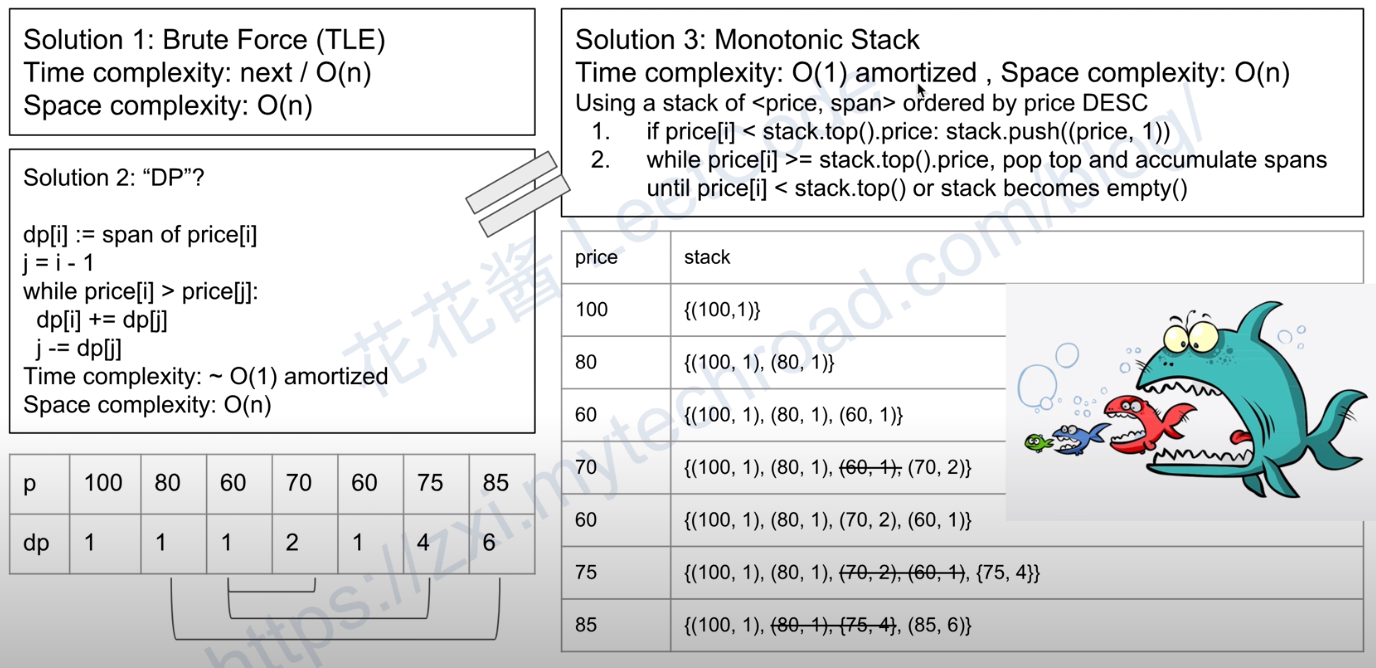

In [12]:
from IPython.display import Image
Image(filename = '​Online Stock Span.jpg', width=600, height=500)

In [13]:
class StockSpanner:

    def __init__(self):
        self.a = []

    def next(self, price: int) -> int:
        span = 1
        while self.a and self.a[-1][0] <= price:
            span += self.a.pop()[1]
        self.a.append((price, res))
        return span

# Your StockSpanner object will be instantiated and called as such:
# obj = StockSpanner()
# param_1 = obj.next(price)

# 20. Kth Smallest Element in a BST

Given a binary search tree, write a function kthSmallest to find the kth smallest element in it.

Note:  You may assume k is always valid, 1 ≤ k ≤ BST's total elements.

https://leetcode.com/explore/challenge/card/may-leetcoding-challenge/536/week-3-may-15th-may-21st/3335/

## Idea:
- utilize the property of BTS, in-order traversal >> sorted array

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def kthSmallest(self, root: TreeNode, k: int) -> int:
        
        stack = []
        while root or stack:  
            while root:       # Searching the leftest node of the tree
                stack.append(root)
                root = root.left
            root = stack.pop()   
            k -= 1
            if k == 0 :
                return root.val

### Recurssion

In [ ]:
class Solution(object):
    def kthSmallest(self, root, k):
        """
        :type root: TreeNode
        :type k: int
        :rtype: int
        """
        count = []
        self.helper(root, count)
        return count[k-1]
        
    def helper(self, node, count):
        if not node:
            return
        self.helper(node.left, count)
        count.append(node.val)
        self.helper(node.right, count)

# 21. Count Square Submatrices with All Ones - Dynamic Programming

Given a m * n matrix of ones and zeros, return how many square submatrices have all ones.  

Example 1:  
Input: matrix =    
[ [0,1,1,1],  
  [1,1,1,1],  
  [0,1,1,1]]  
Output: 15  
Explanation:   
There are 10 squares of side 1.  
There are 4 squares of side 2. 
There is  1 square of side 3.  
Total number of squares = 10 + 4 + 1 = 15.  

Example 2:
Input: matrix = 
[ [1,0,1],  
  [1,1,0],  
  [1,1,0]]  
Output: 7  
Explanation:   
There are 6 squares of side 1.    
There is 1 square of side 2.   
Total number of squares = 6 + 1 = 7.  

Constraints:  
1 <= arr.length <= 300  
1 <= arr[0].length <= 300  
0 <= arr[i][j] <= 1

### My Solution - DP - sum(map(sum,dp))求矩阵所有元素之和

In [32]:
def countSquares(matrix) -> int:        
    dp = matrix  
    for i in range(1, len(dp)):
        for j in range(1, len(dp[0])):
            dp[i][j] *= min(dp[i - 1][j], dp[i][j - 1], dp[i - 1][j - 1]) + 1
    return sum(map(sum, dp))

In [47]:
def countSquares2(matrix) -> int: 
    m,n = len(matrix),len(matrix[0])
    dp = [[0]*(n+1) for _ in range(m+1)]
    for i in range(m):
        for j in range(n):
            if matrix[i][j] == 1:
                dp[i+1][j+1] = min(dp[i+1][j],dp[i][j+1],dp[i][j]) + 1
    return sum(map(sum,dp))

In [48]:
matrix = [[0,1,1,1],
          [1,1,1,1],
          [0,1,1,1]]
countSquares2(matrix)

15

# 22. Sort Characters By Frequency

Given a string, sort it in decreasing order based on the frequency of characters.

Example 1:  
Input:  "tree"  
Output: "eert"

Explanation:
'e' appears twice while 'r' and 't' both appear once.  
So 'e' must appear before both 'r' and 't'. Therefore "eetr" is also a valid answer.

Example 2:  
Input: "cccaaa"  
Output:"cccaaa"
 
Explanation:  
Both 'c' and 'a' appear three times, so "aaaccc" is also a valid answer.  
Note that "cacaca" is incorrect, as the same characters must be together.  

Example 3:  
Input: "Aabb"  
Output:"bbAa"

Explanation:  
"bbaA" is also a valid answer, but "Aabb" is incorrect.  
Note that 'A' and 'a' are treated as two different characters. 

### My solution -> sorted values in dict func -> sorted(d.items(),key = lambda x:x[1],reverse = True)

In [57]:
def frequencySort(s: str) -> str:
    d = {}
    res = ''
    for i in s:
        if i not in d:
            d[i] = 1
        else:
            d[i] += 1
    
    d= sorted(d.items(),key = lambda x:x[1],reverse = True)
    for i,v in d:
        res += str(i)*v
    return res

In [58]:
s = "tree"
s = "loveleetcode"
frequencySort(s)

'eeeelloovtcd'

# 23. Interval List Intersections 

Given two lists of closed intervals, each list of intervals is pairwise disjoint and in sorted order.   
Return the intersection of these two interval lists.  
(Formally, a closed interval [a, b] (with a <= b) denotes the set of real numbers x with a <= x <= b.  
The intersection of two closed intervals is a set of real numbers that is either empty, or can be represented as a closed interval.  For example, the intersection of [1, 3] and [2, 4] is [2, 3].)

Example 1:    
Input: A = [[0,2],[5,10],[13,23],[24,25]], B = [[1,5],[8,12],[15,24],[25,26]]    
Output: [[1,2],[5,5],[8,10],[15,23],[24,24],[25,25]]    
Reminder: The inputs and the desired output are lists of Interval objects, and not arrays or lists.

Note:    
0 <= A.length < 1000  
0 <= B.length < 1000  
0 <= A[i].start, A[i].end, B[i].start, B[i].end < 10^9

### Idea
- different with "56. Merge Intervals"
- tranversal interval to find the intersection
     - append intersection
     - which sencond point smaller, moves to next interval

In [34]:
def intervalIntersection(A, B):
    i, j, res = 0, 0, []
    if not A or not B: 
        return res
    
    while i<len(A) and j<len(B):
        start = max(A[i][0],B[j][0])
        end = min(A[i][1],B[j][1])
        if start <= end:
            res.append([start,end])
            print(res)
        if A[i][1] <= B[j][1]:
            i+=1
        else:
            j+=1          
    return res

In [35]:
A = [[0,2],[5,10],[13,23],[24,25]]
B = [[1,5],[8,12],[15,24],[25,26]]
intervalIntersection(A, B)

[[1, 2]]
[[1, 2], [5, 5]]
[[1, 2], [5, 5], [8, 10]]
[[1, 2], [5, 5], [8, 10], [15, 23]]
[[1, 2], [5, 5], [8, 10], [15, 23], [24, 24]]
[[1, 2], [5, 5], [8, 10], [15, 23], [24, 24], [25, 25]]


[[1, 2], [5, 5], [8, 10], [15, 23], [24, 24], [25, 25]]

# 24. Construct Binary Search Tree from Preorder Traversal --  Recursion

Return the root node of a binary search tree that matches the given preorder traversal.

(Recall that a binary search tree is a binary tree where for every node, any descendant of node.left has a value < node.val, and any descendant of node.right has a value > node.val.  Also recall that a preorder traversal displays the value of the node first, then traverses node.left, then traverses node.right.)

It's guaranteed that for the given test cases there is always possible to find a binary search tree with the given requirements.

Example 1:  
Input: [8,5,1,7,10,12]  
Output: [8,5,10,1,7,null,12]

### idea:
- utilize property of pre-order and BTS, find the node is bigger than the root.get the left/right subtree
- recursion

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def bstFromPreorder(self, preorder: List[int]) -> TreeNode:
        if not preorder:
            return None
        
        root = TreeNode(preorder[0])
        N = len(preorder)
        i = 1
        while i < N:
            if preorder[i] > preorder[0]:
                break
            i += 1
        root.left = self.bstFromPreorder(preorder[1:i])
        root.right = self.bstFromPreorder(preorder[i:])
        return root

# 25. Uncrossed Lines

We write the integers of A and B (in the order they are given) on two separate horizontal lines.   
Now, we may draw connecting lines: a straight line connecting two numbers A[i] and B[j] such that:  
A[i] == B[j];  
The line we draw does not intersect any other connecting (non-horizontal) line.  
Note that a connecting lines cannot intersect even at the endpoints: each number can only belong to one connecting line.    
Return the maximum number of connecting lines we can draw in this way.  

Example 1:  
Input: A = [1,4,2], B = [1,2,4]  
Output: 2  
Explanation: We can draw 2 uncrossed lines as in the diagram.  
We cannot draw 3 uncrossed lines, because the line from A[1]=4 to B[2]=4 will intersect the line from A[2]=2 to B[1]=2.

Example 2:  
Input: A = [2,5,1,2,5], B = [10,5,2,1,5,2]  
Output: 3  

Example 3:  
Input: A = [1,3,7,1,7,5], B = [1,9,2,5,1]  
Output: 2

Note:  
1 <= A.length <= 500  
1 <= B.length <= 500  
1 <= A[i], B[i] <= 2000  

In [39]:
class Solution:
    def maxUncrossedLines (A, B) -> int:
        #reduce time complecity
        if len(A) < len(B):
            self.maxUncrossedLines(B,A)
        len_A = len(A)
        len_B = len(B)
        dp = [0]*(len_B+1)
        for i in range(len_A):
            for t in reversed(range(len_B)):
                if A[i] == B[t]:
                    dp[t+1] = dp[t]+1
                    print("1;",i,t,dp)
            for k in range(len_B):
                dp[k+1]=max(dp[k+1],dp[k])
            print("2:",i,t,dp)
        return dp[len_B]              

In [40]:
A = [1,4,2]
B = [1,2,4]
Solution.maxUncrossedLines(A,B)

1; 0 0 [0, 1, 0, 0]
2: 0 0 [0, 1, 1, 1]
1; 1 2 [0, 1, 1, 2]
2: 1 0 [0, 1, 1, 2]
1; 2 1 [0, 1, 2, 2]
2: 2 0 [0, 1, 2, 2]


2

In [41]:
A = [1,3,7,1,7,5] 
B = [1,9,2,5,1]
Solution.maxUncrossedLines(A,B)

1; 0 4 [0, 0, 0, 0, 0, 1]
1; 0 0 [0, 1, 0, 0, 0, 1]
2: 0 0 [0, 1, 1, 1, 1, 1]
2: 1 0 [0, 1, 1, 1, 1, 1]
2: 2 0 [0, 1, 1, 1, 1, 1]
1; 3 4 [0, 1, 1, 1, 1, 2]
1; 3 0 [0, 1, 1, 1, 1, 2]
2: 3 0 [0, 1, 1, 1, 1, 2]
2: 4 0 [0, 1, 1, 1, 1, 2]
1; 5 3 [0, 1, 1, 1, 2, 2]
2: 5 0 [0, 1, 1, 1, 2, 2]


2

# 26. Contiguous Array - April.13

Given a binary array, find the maximum length of a contiguous subarray with equal number of 0 and 1.

Example 1:  
Input: [0,1]  
Output: 2  
Explanation: [0, 1] is the longest contiguous subarray with equal number of 0 and 1.

Example 2:  
Input: [0,1,0]  
Output: 2  
Explanation: [0, 1] (or [1, 0]) is a longest contiguous subarray with equal number of 0 and 1.

### Idea:
- 0>>-1, count(0)=count(1),sum=0
- d={sum:index,...},if sum in d, it means (current_index-index).sum()=0. length = current_index - index
- Notice ！！！ initialize dict = {0:1}

### Original Solution

In [ ]:
def findMaxLength(nums) -> int:
    count = 0
    max_length=0
    table = {0: -1}
    for index, num in enumerate(nums):
        if num == 0:
            count -= 1
        else:
            count += 1

        if count in table:
            max_length = max(max_length, index - table[count])
        else:
            table[count] = index

    return max_length 

### My Solution

In [39]:
def findMaxLength(nums) -> int:
    d = {0:-1}
    s = 0
    maxl = 0
    
    for i,num in enumerate(nums):
        if num == 0:
            num = -1
        s += num
        if s in d:
            length = i - d[s]
            maxl = max(length,maxl)
        else:
            d[s] = i
    return maxl      

In [40]:
nums = [0,1]
findMaxLength(nums)
nums = [0,1,0]
findMaxLength(nums)

2

2

# 27. Possible Bipartition -- 886 -- Graph

Given a set of N people (numbered 1, 2, ..., N), we would like to split everyone into two groups of any size.  
Each person may dislike some other people, and they should not go into the same group.   
Formally, if dislikes[i] = [a, b], it means it is not allowed to put the people numbered a and b into the same group.  
Return true if and only if it is possible to split everyone into two groups in this way.

Example 1:  
Input: N = 4, dislikes = [[1,2],[1,3],[2,4]]  
Output: true  
Explanation: group1 [1,4], group2 [2,3]

Example 2:  
Input: N = 3, dislikes = [[1,2],[1,3],[2,3]]  
Output: false  

Example 3:   
Input: N = 5, dislikes = [[1,2],[2,3],[3,4],[4,5],[1,5]]  
Output: false

Note:  
1 <= N <= 2000  
0 <= dislikes.length <= 10000  
1 <= dislikes[i][j] <= N  
dislikes[i][0] < dislikes[i][1]  
There does not exist i != j for which dislikes[i] == dislikes[j].

### Idea - Graph + bfs
- build graph
- graph coloring 
    - 0:uncolored，1:red，-1:blue
- if no conflict: return True

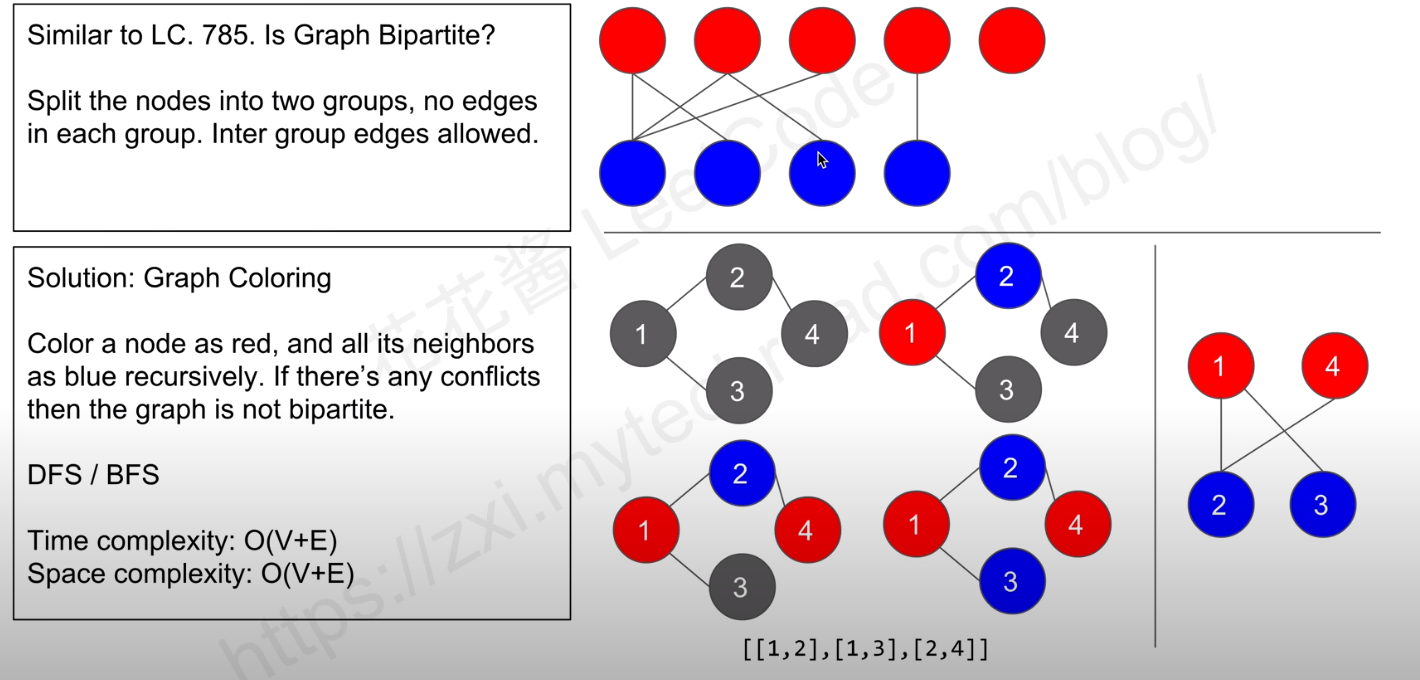

In [5]:
from IPython.display import Image
Image(filename = '27.jpg', width=600, height=500)

# example:
# 1-red >> neghbor of 1: 2-blue >> neighbor of 2: 1 already red, 4-red >> 4 has no neighbor，traceback to 1 >> neighbor of 1: 3-blue

In [32]:
def possibleBipartition(N, dislikes) -> bool:
    import collections
    graph = collections.defaultdict(list)
    for dislike in dislikes:
        graph[dislike[0]-1].append(dislike[1]-1)
        graph[dislike[1]-1].append(dislike[0]-1)
    print(graph)
    color = [0]*N
    for i in range(N):
        # colored - pass
        if color[i] != 0: 
            continue
        # uncolored
        bfs = collections.deque() # i: starting point for bfs
        bfs.append(i)
        color[i] = 1 #  red
        print(i)
        while bfs:
            print(bfs,color)
            cur = bfs.popleft() # take the first as cur - red
            print(cur)
            for e in graph[cur]: 
                if color[e] != 0: # if it is colored
                    if color[cur] == color[e]: # same color: False
                        return False
                else:
                    color[e] =  -color[cur] # color all neighbors of cur as blue 
                    bfs.append(e)
                    
    return True

In [33]:
N = 5
dislikes = [[1,2],[2,3],[3,4],[4,5],[1,5]]
possibleBipartition(N, dislikes)

defaultdict(<class 'list'>, {0: [1, 4], 1: [0, 2], 2: [1, 3], 3: [2, 4], 4: [3, 0]})
0
deque([0]) [1, 0, 0, 0, 0]
0
deque([1, 4]) [1, -1, 0, 0, -1]
1
deque([4, 2]) [1, -1, 1, 0, -1]
4
deque([2, 3]) [1, -1, 1, 1, -1]
2


False

# 28. Counting Bits

Given a non negative integer number num. For every numbers i in the range 0 ≤ i ≤ num calculate the number of 1's in their binary representation and return them as an array.

Example 1:  
Input: 2  
Output: [0,1,1]

Example 2:  
Input: 5  
Output: [0,1,1,2,1,2] 

Follow up:  
It is very easy to come up with a solution with run time O(n*sizeof(integer)). But can you do it in linear time O(n) /possibly in a single pass?  
Space complexity should be O(n).  
Can you do it like a boss? Do it without using any builtin function like __builtin_popcount in c++ or in any other language

Hide Hint1 : You should make use of what you have produced already.  
Hide Hint 2 : Divide the numbers in ranges like [2-3], [4-7], [8-15] and so on. And try to generate new range from previous.  
Hide Hint 3 : Or does the odd/even status of the number help you in calculating the number of 1s?

### My Solution - bin() + for loop

In [11]:
def countBits(num: int):
    result = []
    for i in range(num+1):
        result.append(str(bin(i)).count("1"))
    return result

### Idea:
- num > 0
    - num is odd, 那么1的个数一定是i/2的二进制位向左移一位然后个位填充1，所以对于i是奇数的情况，它的二进制的个数是i/2奇数个数+1。
    - num is even, 那么二进制展开后的个位一定是0，它的二进制的个数是i/2的偶数的个数。
- DP
    - dp[i] = 0,       if i==0
    - dp[i] = dp[i/2],   if i=even
    - dp[i] = dp[i/2]+1,  if i=odd

In [17]:
def countBits(num: int):
    result = [0]*(num+1)
    for i in range(num+1):
        result[i] = result[i // 2] + (i & 1)
        print(i,result)
    return result

In [18]:
'''
0: 0000 - 0
1: 0001 - 1 - odd - 0 leftshift+1 
2: 0010 - 1 - even = "1" = 1
3: 0011 - 2 - odd - 1 leftdhift+1
4: 0100 - 1 - even = "2" = 1
5: 0101 - 2 - odd - 2 leftdhift+1
'''
countBits(15)

'\n0: 0000 - 0\n1: 0001 - 1 - odd - 0 leftshift+1 \n2: 0010 - 1 - even = 1\n3: 0011 - 2 - odd - 1 leftdhift+1\n4: 0100 - 1 - even = 1\n5: 0101 - 2 - odd - 2 leftdhift+1\n'

0 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
1 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2 [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
3 [0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
4 [0, 1, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
5 [0, 1, 1, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
6 [0, 1, 1, 2, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0]
7 [0, 1, 1, 2, 1, 2, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0]
8 [0, 1, 1, 2, 1, 2, 2, 3, 1, 0, 0, 0, 0, 0, 0, 0]
9 [0, 1, 1, 2, 1, 2, 2, 3, 1, 2, 0, 0, 0, 0, 0, 0]
10 [0, 1, 1, 2, 1, 2, 2, 3, 1, 2, 2, 0, 0, 0, 0, 0]
11 [0, 1, 1, 2, 1, 2, 2, 3, 1, 2, 2, 3, 0, 0, 0, 0]
12 [0, 1, 1, 2, 1, 2, 2, 3, 1, 2, 2, 3, 2, 0, 0, 0]
13 [0, 1, 1, 2, 1, 2, 2, 3, 1, 2, 2, 3, 2, 3, 0, 0]
14 [0, 1, 1, 2, 1, 2, 2, 3, 1, 2, 2, 3, 2, 3, 3, 0]
15 [0, 1, 1, 2, 1, 2, 2, 3, 1, 2, 2, 3, 2, 3, 3, 4]


[0, 1, 1, 2, 1, 2, 2, 3, 1, 2, 2, 3, 2, 3, 3, 4]

# 29. Course Schedule

There are a total of numCourses courses you have to take, labeled from 0 to numCourses-1.  
Some courses may have prerequisites, for example to take course 0 you have to first take course 1, which is expressed as a pair: [0,1]  
Given the total number of courses and a list of prerequisite pairs, is it possible for you to finish all courses?

Example 1:  
Input: numCourses = 2, prerequisites = [[1,0]]  
Output: true  
Explanation: There are a total of 2 courses to take.  
To take course 1 you should have finished course 0. So it is possible.

Example 2:  
Input: numCourses = 2, prerequisites = [[1,0],[0,1]]  
Output: false  
Explanation: There are a total of 2 courses to take.To take course 1 you should have finished course 0, and to take course 0 you should also have finished course 1. So it is impossible.

Constraints:  
The input prerequisites is a graph represented by a list of edges, not adjacency matrices. Read more about how a graph is represented.
You may assume that there are no duplicate edges in the input prerequisites.
1 <= numCourses <= 10^5 

### 方法一：拓扑排序，BFS

目标：判断这些课程能否构成**有向无环图（DAG）**。而任何时候判断DAG的方法 >> **拓扑排序**。  
拓扑排序，针对DAG，对图进行拓扑排序，即求其中节点的一个拓扑序列，对于所有的有向边（U, V）（由U指向V），在该序列中节点U都排在节点V之前。

- 1. build a graph and a indegree-dict

- 2. for loop for N(=numCourses) times
    - 每次选择入度为0的节点，作为序列的下一个节点，然后移除该节点和以从节点出发的所有边。并把它的入度变为 -1，作为已经取过的点不再使用，同时把从这个点指向的点的入度都 -1.
    **入度，指有向图中某点作为图中边的终点的次数之和。**

判断条件：
循环N次，循环次数不是遍历节点，而是正常取点的话，N次就能把所有的节点都取完了。
- 如果找不到入度为0的点，那么说明存在环, >> False。
- 如果N次操作结束还没判断出来，那么就不是DAG，>> False。
- 如果N次操作，每次都操作成功的去除了一个入度为0的点，那么说明这个图是DAG，>> True.

时间复杂度是O(N ^ 2)，空间复杂度是O(N)。

In [16]:
def canFinish(numCourses: int, prerequisites) -> bool:
    import collections
    graph = collections.defaultdict(list)
    indegrees = collections.defaultdict(int)
    for u, v in prerequisites:
        graph[v].append(u)
        indegrees[u] += 1
    print(graph,indegrees)
    for i in range(numCourses):
        zeroDegree = False
        for j in range(numCourses): # find the zero-indegree
            if indegrees[j] == 0:
                zeroDegree = True
                break
        # case 1: if there is no zero-indegree, there exists a circle >> FALSE
        if not zeroDegree: 
            return False 
        # case 2: from zero indegree, -1, and traversal in j->[X], X_indegree - 1,
        indegrees[j] = -1
        for node in graph[j]:
            indegrees[node] -= 1
            print('i:',i,"j:",j,"node:",node,indegrees)
    return True  

numCourses = 8
prerequisites = [[1,0],[1,7],[7,0],[0,5],[2,6],[6,4]]
canFinish(numCourses,prerequisites)

defaultdict(<class 'list'>, {0: [1, 7], 7: [1], 5: [0], 6: [2], 4: [6]}) defaultdict(<class 'int'>, {1: 2, 7: 1, 0: 1, 2: 1, 6: 1})
i: 1 j: 4 node: 6 defaultdict(<class 'int'>, {1: 2, 7: 1, 0: 1, 2: 1, 6: 0, 3: -1, 4: -1})
i: 2 j: 5 node: 0 defaultdict(<class 'int'>, {1: 2, 7: 1, 0: 0, 2: 1, 6: 0, 3: -1, 4: -1, 5: -1})
i: 3 j: 0 node: 1 defaultdict(<class 'int'>, {1: 1, 7: 1, 0: -1, 2: 1, 6: 0, 3: -1, 4: -1, 5: -1})
i: 3 j: 0 node: 7 defaultdict(<class 'int'>, {1: 1, 7: 0, 0: -1, 2: 1, 6: 0, 3: -1, 4: -1, 5: -1})
i: 4 j: 6 node: 2 defaultdict(<class 'int'>, {1: 1, 7: 0, 0: -1, 2: 0, 6: -1, 3: -1, 4: -1, 5: -1})
i: 6 j: 7 node: 1 defaultdict(<class 'int'>, {1: 0, 7: -1, 0: -1, 2: -1, 6: -1, 3: -1, 4: -1, 5: -1})


True

### 方法二：拓扑排序，DFS

方法是，我们每次找到一个新的点，判断从这个点出发是否有环。

具体做法是使用一个visited数组，当visited[i]值为0，说明还没判断这个点；当visited[i]值为1，说明当前的循环正在判断这个点；当visited[i]值为2，说明已经判断过这个点，含义是从这个点往后的所有路径都没有环，认为这个点是安全的。

那么，我们对每个点出发都做这个判断，检查这个点出发的所有路径上是否有环，如果判断过程中找到了当前的正在判断的路径，说明有环；找到了已经判断正常的点，说明往后都不可能存在环，所以认为当前的节点也是安全的。如果当前点是未知状态，那么先把当前点标记成正在访问状态，然后找后续的节点，直到找到安全的节点为止。最后如果到达了无路可走的状态，说明当前节点是安全的。

findOrder函数中的for循环是怎么回事呢？这个和BFS循环次数不是同一个概念，这里的循环就是看从第i个节点开始能否到达合理结果。这个节点可能没有出度了，那就把它直接放到path里；也可能有出度，那么就把它后面的节点都进行一次遍历，如果满足条件的节点都放到path里，同时把这次遍历的所有节点都标记成了已经遍历；如果一个节点已经被安全的访问过，那么就放过它，继续遍历下个节点。

时间复杂度是O(N ^ 2)，空间复杂度是O(N)。

In [ ]:
def canFinish(self, N, prerequisites):
    """
    :type N,: int
    :type prerequisites: List[List[int]]
    :rtype: bool
    """
    graph = collections.defaultdict(list)
    for u, v in prerequisites:
        graph[u].append(v)
    # 0 = Unknown, 1 = visiting, 2 = visited
    visited = [0] * N
    for i in range(N):
        if not self.dfs(graph, visited, i):
            return False
    return True

# Can we add node i to visited successfully?
def dfs(self, graph, visited, i):
    if visited[i] == 1: return False
    if visited[i] == 2: return True
    visited[i] = 1
    for j in graph[i]:
        if not self.dfs(graph, visited, j):
            return False
    visited[i] = 2
    return True

# 30. K Closest Points to Origin

We have a list of points on the plane.  Find the K closest points to the origin (0, 0).  
(Here, the distance between two points on a plane is the Euclidean distance.)  
You may return the answer in any order.  The answer is guaranteed to be unique (except for the order that it is in.)

Example 1:  
Input: points = [[1,3],[-2,2]], K = 1  
Output: [[-2,2]]  
Explanation:   
The distance between (1, 3) and the origin is sqrt(10).  
The distance between (-2, 2) and the origin is sqrt(8).  
Since sqrt(8) < sqrt(10), (-2, 2) is closer to the origin.  
We only want the closest K = 1 points from the origin, so the answer is just [[-2,2]].

Example 2:  
Input: points = [[3,3],[5,-1],[-2,4]], K = 2  
Output: [[3,3],[-2,4]]  
(The answer [[-2,4],[3,3]] would also be accepted.)  
 
Note:  
1 <= K <= points.length <= 10000  
-10000 < points[i][0] < 10000  
-10000 < points[i][1] < 10000

### My Solution: 2 list to record

In [57]:
def kClosest(points, K: int):
    stack = []
    value = []
    for point in points:
        dist = point[0]**2+point[1]**2
        if len(stack) < K:
            stack.append(point)
            value.append(dist)
        elif len(stack) == K and dist < max(value):
            index = value.index(max(value))
            stack.pop(index)
            value.pop(index)
            stack.append(point)
            value.append(dist)
            
    return stack

### Solution: list.sort(key = lambda x:f(x))

In [58]:
def kClosest(points, K: int):
    points.sort(key = lambda x : x[0]**2+x[1]**2)
    return points[:K]

In [59]:
points = [[0,1],[1,0]]
K = 2
kClosest(points, K)
points = [[1,3],[-2,2]]
K = 1
kClosest(points, K)
points = [[3,3],[5,-1],[-2,4]] 
K = 2
kClosest(points, K)

[[0, 1], [1, 0]]

[[-2, 2]]

[[3, 3], [-2, 4]]

# 31. Edit Distance - 72 - Hard - DP

Given two words word1 and word2, find the minimum number of operations required to convert word1 to word2.  
You have the following 3 operations permitted on a word:  
Insert a character  
Delete a character  
Replace a character  

Example 1: 
Input: word1 = "horse", word2 = "ros"  
Output: 3  
Explanation:   
horse -> rorse (replace 'h' with 'r')  
rorse -> rose (remove 'r')  
rose -> ros (remove 'e')  

Example 2:  
Input: word1 = "intention", word2 = "execution"  
Output: 5  
Explanation:   
intention -> inention (remove 't')  
inention -> enention (replace 'i' with 'e')  
enention -> exention (replace 'n' with 'x')  
exention -> exection (replace 'n' with 'c')  
exection -> execution (insert 'u')

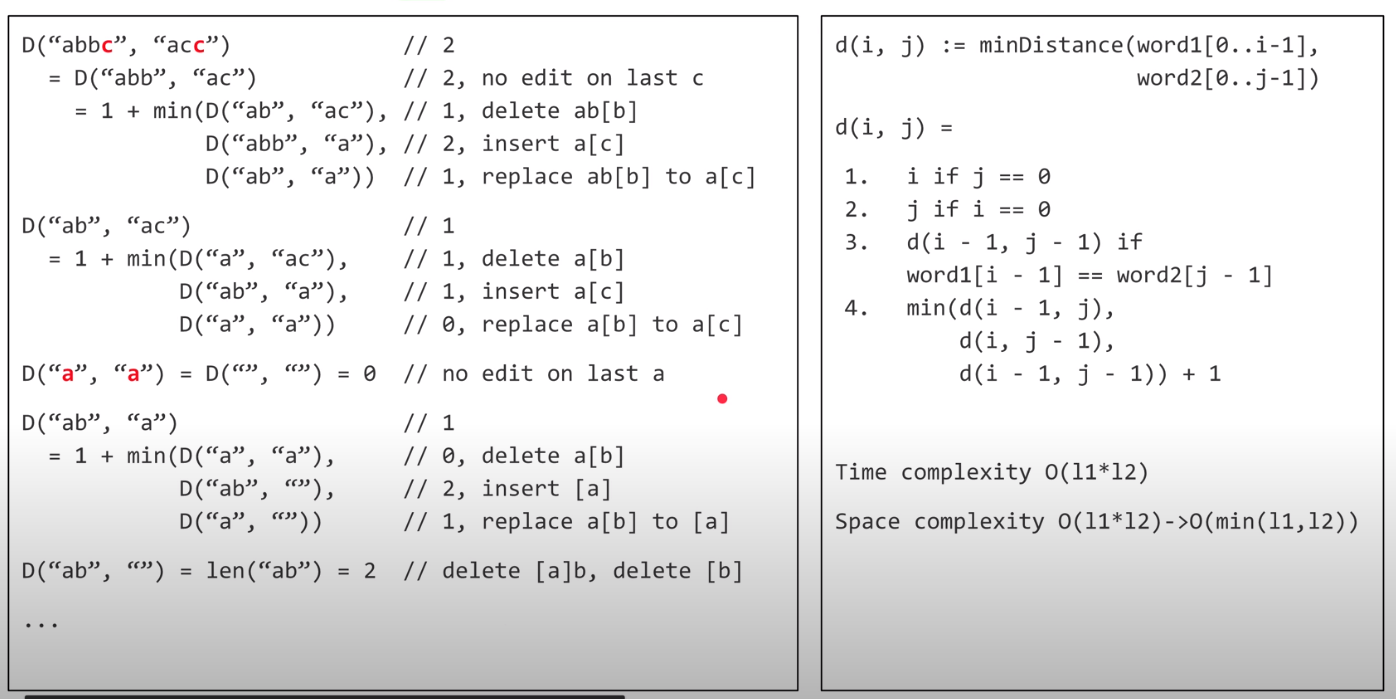

In [4]:
from IPython.display import Image
Image(filename = '31.jpg', width=600, height=500)

In [22]:
def minDistance(word1, word2):
    m , n = len(word1), len(word2)
    dp = [[0]*(n+1) for _ in range(m+1)]
    for i in range(n+1):
        dp[0][i]=i
    for i in range(m+1):
        dp[i][0]=i
        
    print(dp)
    for i in range(1,m+1):
        for j in range(1,n+1):
            dp[i][j]=min(dp[i-1][j]+1, dp[i][j-1]+1, dp[i-1][j-1]+(0 if word1[i-1] == word2[j-1] else 1))
            # dp[i-1][j]: del
            # dp[i][j-1]: insert
            # dp[i-1][j-1]: replace
    print(dp)
    return dp[m][n]

In [23]:
word1 = "horse" 
word2 = "ros"
minDistance(word1,word2)

[[0, 1, 2, 3], [1, 0, 0, 0], [2, 0, 0, 0], [3, 0, 0, 0], [4, 0, 0, 0], [5, 0, 0, 0]]
[[0, 1, 2, 3], [1, 1, 2, 3], [2, 2, 1, 2], [3, 2, 2, 2], [4, 3, 3, 2], [5, 4, 4, 3]]


3